In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

In [235]:
# Define the file path
txt_file = '/Users/lauslender/Desktop/co2-prototype test 1 parsed.txt'  # Change this to your actual file path

# Define column names
column_names = ["Time", "Temperature Setpoint", "Temperature Reading", "Humidity", "CO2 Setpoint", "CO2 Reading"]

# Read the text file with space as a delimiter
df = pd.read_csv(txt_file, delim_whitespace=True, names=column_names, header=0)

# Multiply Setpoint_CO2 by 1000
df["CO2 Setpoint"] *= 1000 # Convert CO2 % to parts per million (ppm)
df["Time"] -= 120

# Print the DataFrame
print(df)


      Time  Temperature Setpoint  Temperature Reading  Humidity  CO2 Setpoint  \
0        2                  38.0                 22.7      28.4        5000.0   
1        4                  38.0                 22.7      28.6        5000.0   
2        6                  38.0                 22.7      28.8        5000.0   
3        8                  38.0                 22.7      28.9        5000.0   
4       10                  38.0                 22.7      29.1        5000.0   
...    ...                   ...                  ...       ...           ...   
1792  3591                  38.0                 38.3      59.4        5000.0   
1793  3593                  38.0                 38.3      59.5        5000.0   
1794  3595                  38.0                 38.3      59.6        5000.0   
1795  3597                  38.0                 38.3      59.5        5000.0   
1796  3599                  38.0                 38.3      59.6        5000.0   

      CO2 Reading  
0      

/var/folders/vn/85_k1z3x6wv6jr2573l5llgm0000gn/T/ipykernel_45220/2261004340.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(txt_file, delim_whitespace=True, names=column_names, header=0)


Plotting the Data

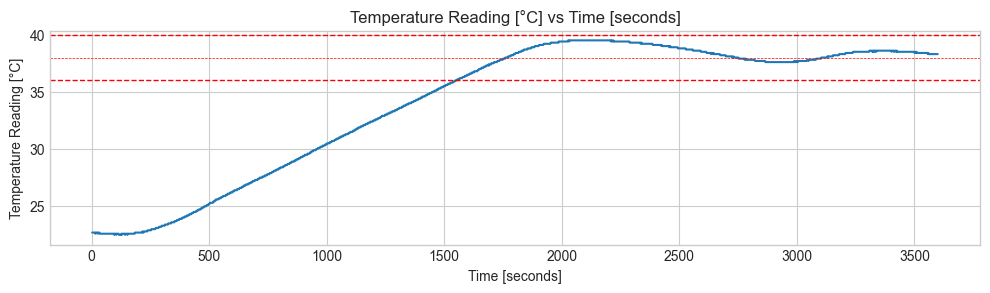

In [236]:
# Plot Temperature_Reading vs Time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(df["Time"], df["Temperature Reading"], linewidth=1.5)
plt.axhline(y=38, color='red', linestyle='--', linewidth=0.5)
plt.axhline(y=40, color='red', linestyle='--', linewidth=1)
plt.axhline(y=36, color='red', linestyle='--', linewidth=1)
plt.xlabel("Time [seconds]")
plt.ylabel("Temperature Reading [°C]")
plt.title("Temperature Reading [°C] vs Time [seconds]")

plt.tight_layout()
#plt.legend()
plt.show()

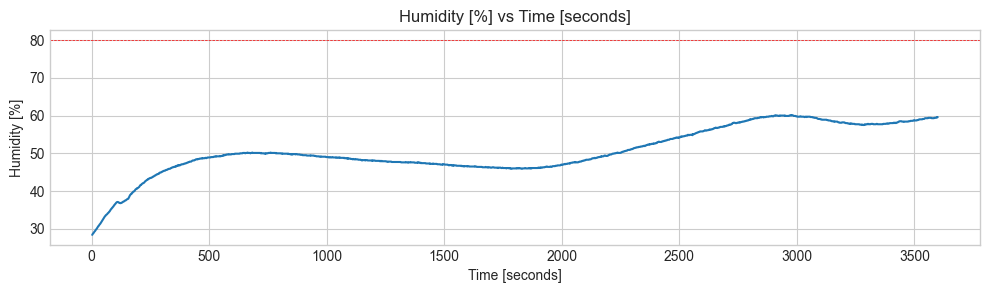

In [237]:
# Plot Temperature_Reading vs Time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(df["Time"], df["Humidity"], linewidth=1.5)
plt.axhline(y=80, color='red', linestyle='--', linewidth=0.5)
plt.xlabel("Time [seconds]")
plt.ylabel("Humidity [%]")
plt.title("Humidity [%] vs Time [seconds]")

plt.tight_layout()
#plt.legend()
plt.show()

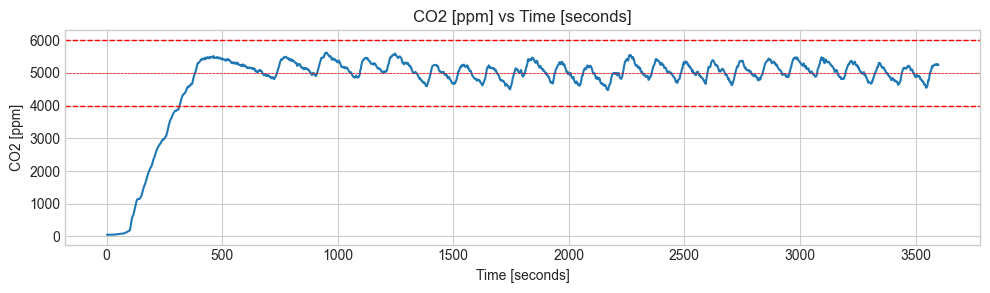

In [238]:
# Plot Temperature_Reading vs Time
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(df["Time"], df["CO2 Reading"], linewidth=1.5)
plt.axhline(y=5000, color='red', linestyle='--', linewidth=0.5)
plt.axhline(y=6000, color='red', linestyle='--', linewidth=1)
plt.axhline(y=4000, color='red', linestyle='--', linewidth=1)
plt.xlabel("Time [seconds]")
plt.ylabel("CO2 [ppm]")
plt.title("CO2 [ppm] vs Time [seconds]")

plt.tight_layout()
#plt.legend()
plt.show()

Noarmalizing the Data

In [239]:
# Normalize the data
normalized_df = (df - df.min()) / (df.max() - df.min())
print("\nNormalized DataFrame:")
print(normalized_df)



Normalized DataFrame:
          Time  Temperature Setpoint  Temperature Reading  Humidity  \
0     0.000000                   NaN             0.011765  0.000000   
1     0.000556                   NaN             0.011765  0.006309   
2     0.001112                   NaN             0.011765  0.012618   
3     0.001668                   NaN             0.011765  0.015773   
4     0.002224                   NaN             0.011765  0.022082   
...        ...                   ...                  ...       ...   
1792  0.997776                   NaN             0.929412  0.977918   
1793  0.998332                   NaN             0.929412  0.981073   
1794  0.998888                   NaN             0.929412  0.984227   
1795  0.999444                   NaN             0.929412  0.981073   
1796  1.000000                   NaN             0.929412  0.984227   

      CO2 Setpoint  CO2 Reading  
0              NaN     0.000359  
1              NaN     0.000359  
2              NaN    

In [240]:
# Compute and print the correlation matrix for Humidity and CO2_Reading
correlation_matrix = df[["Time", "Humidity", "Temperature Reading", "CO2 Reading"]].corr()
print("\nCorrelation Matrix for Humidity and CO2 Reading:")
print(correlation_matrix)


Correlation Matrix for Humidity and CO2 Reading:
                         Time  Humidity  Temperature Reading  CO2 Reading
Time                 1.000000  0.835102             0.879175     0.419818
Humidity             0.835102  1.000000             0.610804     0.635437
Temperature Reading  0.879175  0.610804             1.000000     0.510390
CO2 Reading          0.419818  0.635437             0.510390     1.000000


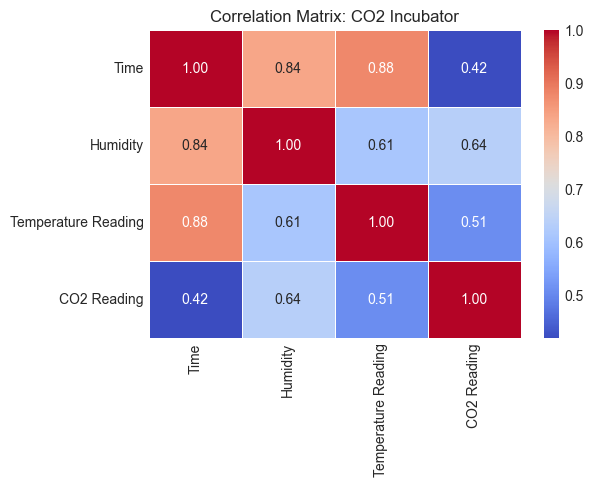

In [241]:
# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: CO2 Incubator")
plt.show()